In [1]:
# import wrapper class PyVisa_Keysight_34465A from python file PyVisa_Keysight_34465A_class.py
# from ../PyVisa_Keysight_34465A_class.py import PyVisa_Keysight_34465A

# classe PyVisa_Keysight_34465A has to imported via importlib due to different path of notebook and class file
import importlib.util

spec = importlib.util.spec_from_file_location("PyVisa_Keysight_34465A", "../PyVisa_Keysight_34465A_class.py")
keysight_class = importlib.util.module_from_spec(spec)
spec.loader.exec_module(keysight_class)

In [2]:
# IP of devices
ip_str = '192.168.12.150'
#ip_str = '192.168.10.113'

# create new device object for the digital multimeter (DMM) Keysight 34465A
dmm = keysight_class.PyVisa_Keysight_34465A(tcp_ip = ip_str)
#dmm = PyVisa_Keysight_34465A(tcp_ip = ip_str)

In [3]:
# read connection state of the device
dmm.status

'Connected'

In [4]:
# read connection path (at the moment there is only TCP/IP implemented)
dmm.connected_with

'LAN over 192.168.12.150'

In [5]:
# configure DMM for temperature measurement with a valid configuration
dmm.confTempMeasure('01_PT100_4WIRE')

In [7]:
import time

while True:
    try:
        # retrieve temperature value
        temp = dmm.getMeasurement()
        print("<{:s}> Temperature: {:.7f} °C".format(time.strftime('%H:%M:%S'), temp))
        time.sleep(0.5)
    
    except:
        print("Keyboard Interrupt ^C detected.")
        print("Bye.")

        break

<20:22:59> Temperature: 19.4482341 °C
<20:23:00> Temperature: 19.4476427 °C
<20:23:01> Temperature: 19.4478729 °C
<20:23:02> Temperature: 19.4479732 °C
Keyboard Interrupt ^C detected.
Bye.


In [9]:
import datetime
#import matplotlib
#matplotlib.use("tkAgg")
import matplotlib.pyplot as plt
%matplotlib inline
import time

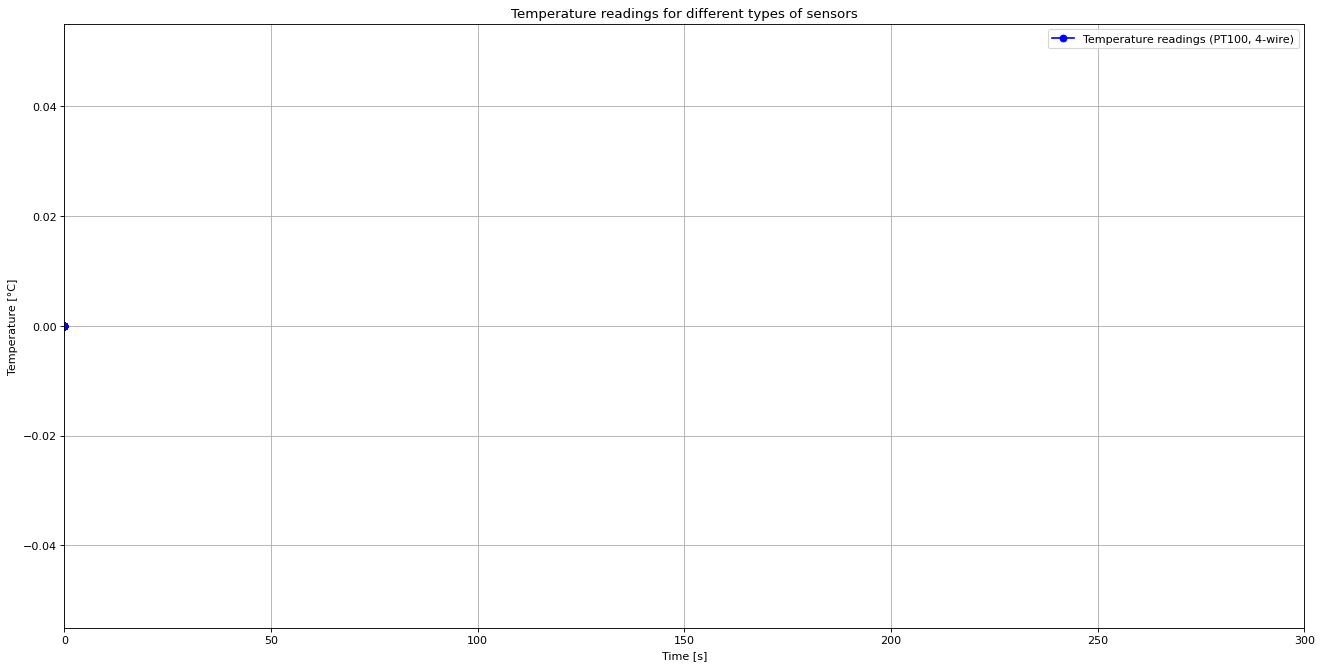

In [10]:
# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

# Initialization of the value arrays with 30 zeros as start (especially important for moving average)
window_avg = 30
x_var = [0] * window_avg
y_var = [0] * window_avg
pd_mavg = [0] * window_avg
#cpm_var = [0] * window_avg

fig = plt.figure(num=1, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()

xlim_left = 0
xlim_right = 300
xlim_scroll = 290 #290
axes.set_xlim(xlim_left, xlim_right)

line, = axes.plot(x_var, y_var, 'bo-', label='Temperature readings (PT100, 4-wire)')
#line_avg, = axes.plot(x_var, pd_mavg, color='orange', linestyle='solid', label='Moving average over 30s')
#line_cpm, = axes.plot(x_var, cpm_var, color='green', linestyle='solid', label='Counts per minute')

title_string='Temperature readings for different types of sensors'
axes.set_title(title_string)
axes.grid(True)
axes.set_xlabel('Time [s]')
axes.set_ylabel('Temperature [°C]')
plt.legend()
plt.show()

time_index = 0

In [11]:
while True:
    #try:
    
    # retrieve temperature value
    temp_flt = dmm.getMeasurement()

    #print("<{:s}> Temperature: {:.7f} °C".format(time.strftime('%H:%M:%S'), temp_flt))

    time_index = time_index + 1

    # kurz bevor der rechte Rand erreicht wird, soll das Canvas nach links weiterscrollen
    if (time_index >= xlim_scroll):
        xlim_left = xlim_left + 1
        xlim_right = xlim_right + 1
        axes.set_xlim(xlim_left, xlim_right)

    x_var.append(time_index)
    y_var.append(temp_flt)

    # Arrays auf sichtbaren Bereich beschneiden (besonders wichtig für Autoskalierung der y-Achse)
    x_var_display = x_var[xlim_left:xlim_right]
    y_var_display = y_var[xlim_left:xlim_right]

    # neue Werte plotten
    line.set_xdata(x_var_display)
    line.set_ydata(y_var_display)

    axes.relim()
    axes.autoscale_view()
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    #plt.show()

    #print("##### WAS HERE ... #####")

    time.sleep(1)
        
    #except:
    #    print("Keyboard Interrupt ^C detected.")
    #    print("Bye.")

    #    break

KeyboardInterrupt: 

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib widget
from IPython.display import display, clear_output

x = np.linspace(0, 10, 100)
y = np.cos(x)

plt.ioff()
figure, axes = plt.subplots(figsize=(8,6))
#plt.ion()



#figure = plt.figure()
#ax = figure.add_subplot(1, 1, 1)

line1, = axes.plot(x, y)

plt.title("Dynamic Plot of sin(x)",fontsize=22)

plt.xlabel("x",fontsize=18)
plt.ylabel("sin(x)",fontsize=18)

Text(0, 0.5, 'sin(x)')

In [2]:
for p in range(10):
    updated_y = np.cos(x-0.05*p)
    
    line1.set_xdata(x)
    line1.set_ydata(updated_y)
    
    #line.set_xdata(x_var_display)
    #line.set_ydata(y_var_display)

    axes.relim()
    axes.autoscale_view()
    figure.canvas.draw()
    figure.canvas.flush_events()
    
    #plt.show()
    
    #axes.cla()
    #axes.plot(x, updated_y)
    
    #figure.canvas.draw()
    
    #figure.canvas.flush_events()
    
    #display(figure)    
    #clear_output(wait = True)
    #display(figure.canvas)
    
    time.sleep(0.5)


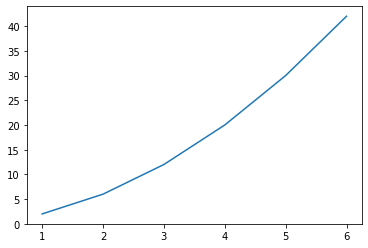

[1, 2, 3, 4, 5, 6]


In [4]:
import matplotlib.pyplot as plt
import time
%matplotlib inline
fig = plt.figure()
axes = fig.add_subplot(111)

hfig = display(fig, display_id=True)
values = [1,2,3,4,5,6]

def draw():
    #fig.clf()
    axes.plot(values, [v*v for v in values])
    fig.canvas.draw()
    hfig.update(fig)
    time.sleep(1)

def update():
    print(str(values))
    axes.cla()
    axes.plot(values, [v*(v+1) for v in values])
    fig.canvas.draw()
    hfig.update(fig)

draw()
time.sleep(1)
update()
plt.close(fig)

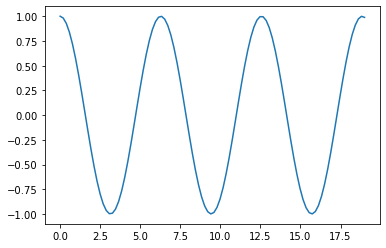

In [7]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Create figure and subplot

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

# Define and update plot

for i in range(20):
    x = np.linspace(0, i, 100);
    y = np.cos(x) 
    ax.set_xlim(0, i)    
    ax.cla()
    ax.plot(x, y)
    display(fig)    
    clear_output(wait = True)
    plt.pause(0.5)
    #time.sleep(0.5)

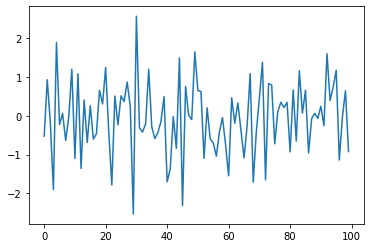

In [8]:
# updating the plot is achieved by redrawing the whole plot in every loop cycle

%matplotlib inline
import time
import pylab as pl
from IPython import display

for i in range(10):
    pl.clf()
    pl.plot(pl.randn(100))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1.0)

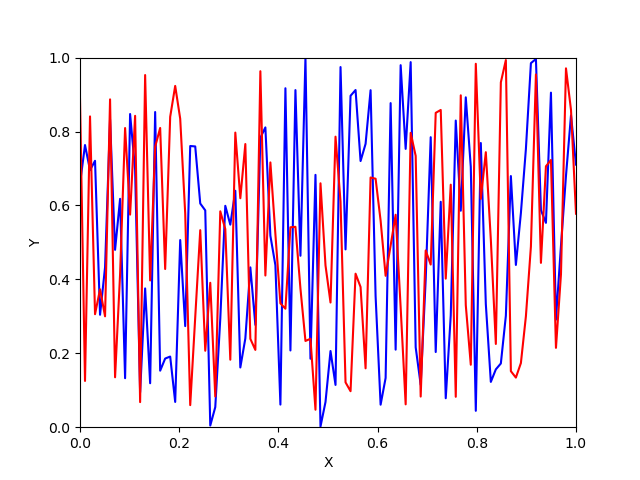

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

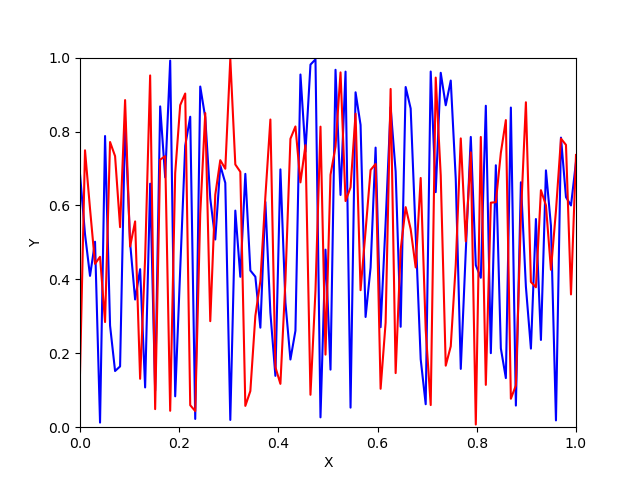

In [3]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

interactive(children=(FloatSlider(value=2.5, description='freq', max=5.0, min=1.0, step=0.5), Output()), _dom_…

<function __main__.plot_func(freq)>

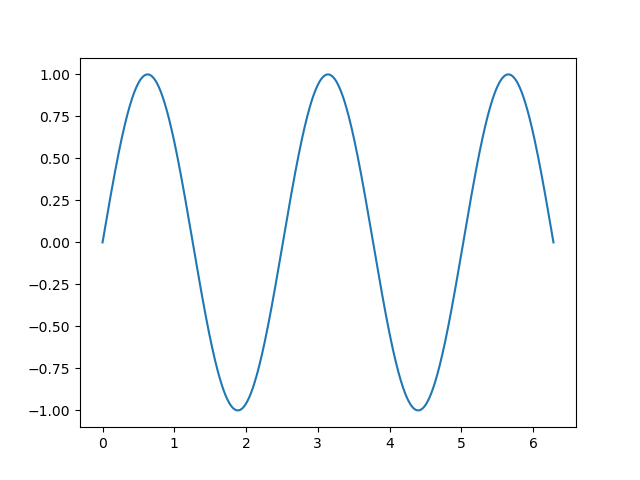

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np

def plot_func(freq):
    x = np.linspace(0, 2*np.pi,1000)
    y = np.sin(x * freq)
    plt.plot(x, y)

interact(plot_func, freq = widgets.FloatSlider(value=2.5, min=1, 
max=5.0,step=0.5))

In [1]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

x=np.linspace(0,2,1000)
fig, ax=plt.subplots(1,figsize=(10,4))
plt.suptitle('Sine Wave')

def update_plot(amp, phase, freq):
    '''
    this function linked to the sliders and 
    it replots the sine waves when the sliders are changed
    '''
    ax.clear()
    y = amp * np.sin(freq * 2 * np.pi * x + phase * 2 * np.pi)
    ax.plot(x,y)
    plt.show()


amp=widgets.FloatSlider(min=1,max=10,value=4,description='Amp')
phase=widgets.FloatSlider(min=0,max=5,value=0,description='Phase')
freq=widgets.FloatSlider(min=1,max=10,value=1,description='Freq')

widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)

interactive(children=(FloatSlider(value=4.0, description='Amp', max=10.0, min=1.0), FloatSlider(value=0.0, des…

In [1]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import time

In [4]:
plt.ioff()

fig, ax = plt.subplots()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'

factor = np.linspace(0.02, 1, 50)

plt.title('Plotting: y=sin({} * x)'.format(factor[0]))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(factor[0] * x))

fig.canvas.draw()
fig.canvas.flush_events()

#display(fig.canvas)

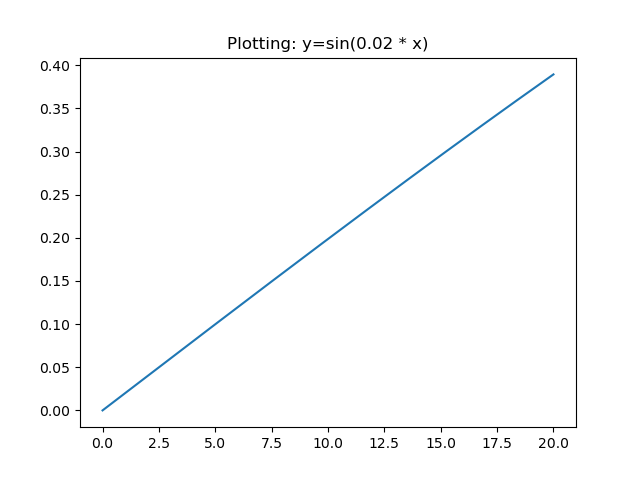

In [5]:
display(fig.canvas)

for f in factor:
    #print(f)
    updated_y = np.sin(f * x)
    
    plt.title('Plotting: y=sin({:.3f} * x)'.format(f))
    lines[0].set_xdata(x)
    lines[0].set_ydata(updated_y)
    
    ax.relim()
    ax.autoscale_view()
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    time.sleep(0.2)